In [37]:
import pandas as pd
import numpy as np
from statsmodels.tools import add_constant
import statsmodels.api as sm

In [2]:
df = pd.read_csv('regression.csv')

In [10]:
df.drop(0, axis=0, inplace=True)
df

,date,seizure,HK_exports_to_Korea_logdiff
1,2001-03-01,4035.0,0.023309
2,2001-04-01,3636.0,-0.014729
3,2001-05-01,42145.0,-0.017692
4,2001-06-01,2973.0,-0.151941
5,2001-07-01,6447.0,0.092546
...,...,...,...
288,2025-02-01,22929.0,-0.226862
289,2025-03-01,15695.0,0.062489
290,2025-04-01,33653.0,-0.071124
291,2025-05-01,3346.0,-0.035947


In [38]:
window_df = df.iloc[0: 13].copy()


X = window_df['HK_exports_to_Korea_logdiff'].shift(1)
Y = window_df['seizure']

valid_idx = X.notna() & y.notna()
X_valid = X[valid_idx]
y_valid = y[valid_idx]

X_valid = add_constant(X_valid)
model = sm.OLS(y_valid, X_valid).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seizure   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                   0.02355
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.881
Time:                        16:38:06   Log-Likelihood:                -138.77
No. Observations:                  12   AIC:                             281.5
Df Residuals:                      10   BIC:                             282.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1.454e+04   8054.702      1.805      0.101   -3410.820    3.25e+04
HK_exports_to_Korea_logdiff  1.849e+04    1.2e+05      0.153      0.881    -2.5e+05    2.87e+05
==============================================================================
Omnibus:                       22.218   Durbin-Watson:                   2.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.275
Skew:                           2.298   Prob(JB):                     0.000108
Kurtosis:                       6.928   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\USER\AppData\Local\Temp\ipykernel_34288\4034387028.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_beta = model.params[1]  # exports_to_Korea_logdiff 계수
C:\Users\USER\AppData\Local\Temp\ipykernel_34288\4034387028.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_beta = model.params[1]  # exports_to_Korea_logdiff 계수
C:\Users\USER\AppData\Local\Temp\ipykernel_34288\4034387028.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

        date  best_lag          beta        r2
0 2002-09-01        12 -25574.132082  0.080106
1 2002-10-01        12 -25206.379341  0.084989
2 2002-11-01        12 -25276.974282  0.085579
3 2002-12-01        12 -25238.013832  0.085277
4 2003-01-01        12 -29355.869645  0.102786


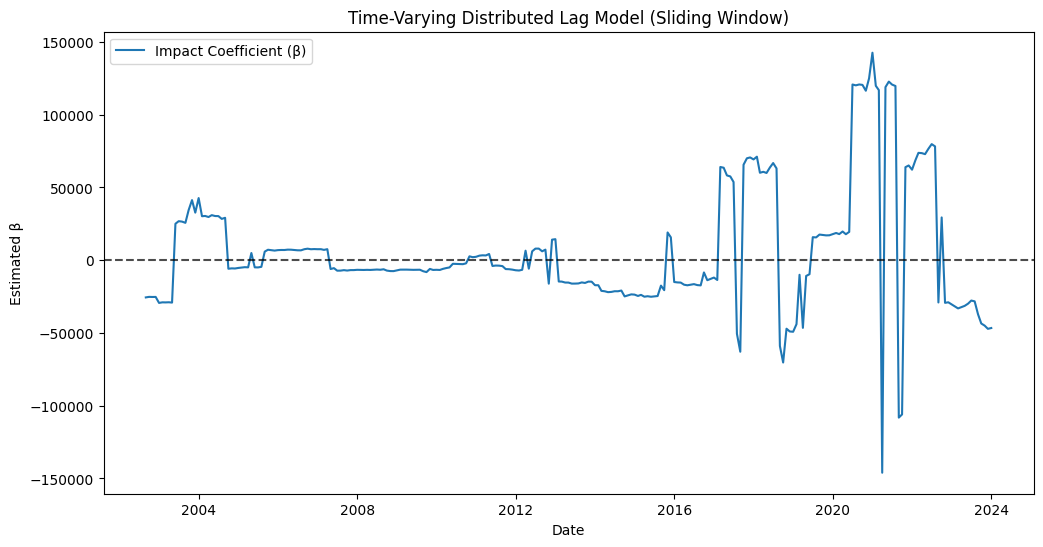

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 1. 데이터 불러오기
df = pd.read_csv('regression.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)
df.drop(0, axis=0, inplace=True)

# 2. 파라미터 설정
window_size = 36  # 3년 단위 윈도우
max_lag = 12      # 최대 12개월 시차

# 결과 저장용 리스트
results = []

# 3. 슬라이딩 윈도우
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_df = df.iloc[start:end].copy()

    best_r2 = -np.inf
    best_lag = None
    best_beta = None

    # 4. lag별 회귀 성능 비교
    for lag in range(0, max_lag + 1):
        # 독립변수 생성
        X = window_df['HK_exports_to_Korea_logdiff'].shift(lag)
        y = window_df['seizure']

        # 회귀에 필요한 NaN 제거
        valid_idx = X.notna() & y.notna()
        X_valid = X[valid_idx]
        y_valid = y[valid_idx]

        if len(X_valid) < 10:  # 데이터 너무 적으면 skip
            continue

        X_valid = sm.add_constant(X_valid)
        model = sm.OLS(y_valid, X_valid).fit()

        if model.rsquared > best_r2:
            best_r2 = model.rsquared
            best_lag = lag
            best_beta = model.params[1]  # exports_to_Korea_logdiff 계수

    # 윈도우 중앙 시점 기준 기록
    mid_date = window_df['date'].iloc[window_size // 2]
    results.append({
        'date': mid_date,
        'best_lag': best_lag,
        'beta': best_beta,
        'r2': best_r2
    })

# 5. 결과 저장
result_df = pd.DataFrame(results)
result_df.to_csv('tvdml_results.csv', index=False)

print(result_df.head())

# 위험도 시계열 시각화 예시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(result_df['date'], result_df['beta'], label='Impact Coefficient (β)')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Estimated β')
plt.title('Time-Varying Distributed Lag Model (Sliding Window)')
plt.legend()
plt.show()


        date  best_lag          beta      pval        r2  risk_score
0 2002-09-01        12 -25574.132082  0.019481  0.080106         0.0
1 2002-10-01        12 -25206.379341  0.015894  0.084989         0.0
2 2002-11-01        12 -25276.974282  0.014576  0.085579         0.0
3 2002-12-01        12 -25238.013832  0.013388  0.085277         0.0
4 2003-01-01        12 -29355.869645  0.002614  0.102786         0.0


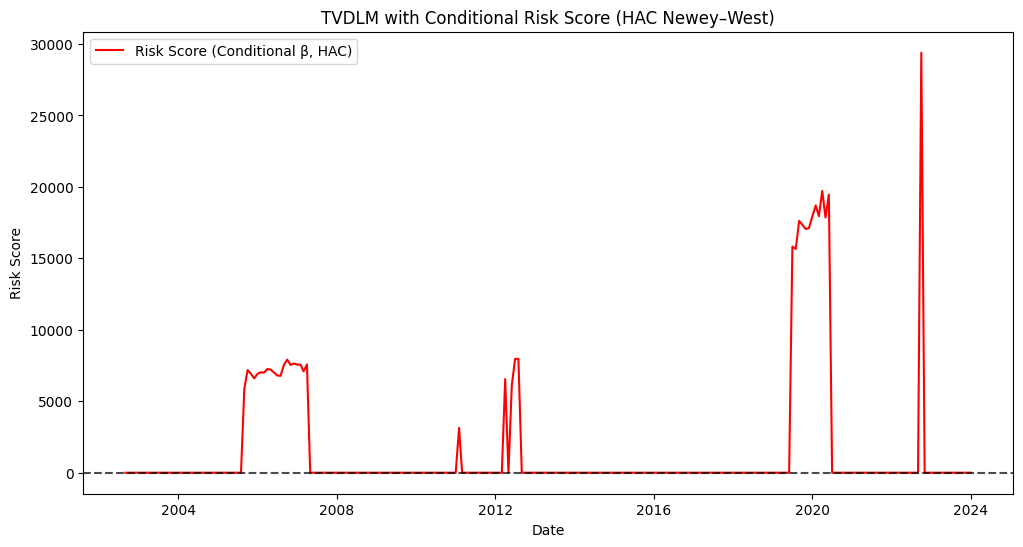

In [46]:
# HAC(Newey–West) 보정 아이디어

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv('regression.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)
df.drop(0, axis=0, inplace=True)

# 2. 파라미터 설정
window_size = 36  # 3년 단위 윈도우
max_lag = 12      # 최대 1년 시차

# 결과 저장용 리스트
results = []

# 3. 슬라이딩 윈도우
for start in range(len(df) - window_size + 1):
    end = start + window_size
    window_df = df.iloc[start:end].copy()

    best_r2 = -np.inf
    best_lag = None
    best_beta = None
    best_pval = None

    # lag별 회귀 성능 비교
    for lag in range(0, max_lag + 1):
        X = window_df['HK_exports_to_Korea_logdiff'].shift(lag)
        y = window_df['seizure']

        valid_idx = X.notna() & y.notna()
        X_valid = X[valid_idx]
        y_valid = y[valid_idx]

        if len(X_valid) < 10:
            continue

        X_valid = sm.add_constant(X_valid)
        # OLS + HAC(Newey–West) 표준오차 보정
        model = sm.OLS(y_valid, X_valid).fit(
            cov_type='HAC', 
            cov_kwds={'maxlags': lag if lag > 0 else 1}  # 최소 1
        )

        if model.rsquared > best_r2:
            best_r2 = model.rsquared
            best_lag = lag
            best_beta = model.params.iloc[1]
            best_pval = model.pvalues.iloc[1]

    # 조건부 위험도 계산
    if (best_beta is not None) and (best_beta > 0) and (best_pval < 0.05):
        risk_score = best_beta
    else:
        risk_score = 0

    # 윈도우 중앙 시점 기준 기록
    mid_date = window_df['date'].iloc[window_size // 2]
    results.append({
        'date': mid_date,
        'best_lag': best_lag,
        'beta': best_beta,
        'pval': best_pval,
        'r2': best_r2,
        'risk_score': risk_score
    })

# 4. 결과 저장
result_df = pd.DataFrame(results)
result_df.to_csv('tvdml_results_with_risk_hac.csv', index=False)

print(result_df.head())

# 5. 위험도 시계열 시각화
plt.figure(figsize=(12,6))
plt.plot(result_df['date'], result_df['risk_score'], label='Risk Score (Conditional β, HAC)', color='red')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Risk Score')
plt.title('TVDLM with Conditional Risk Score (HAC Newey–West)')
plt.legend()
plt.show()


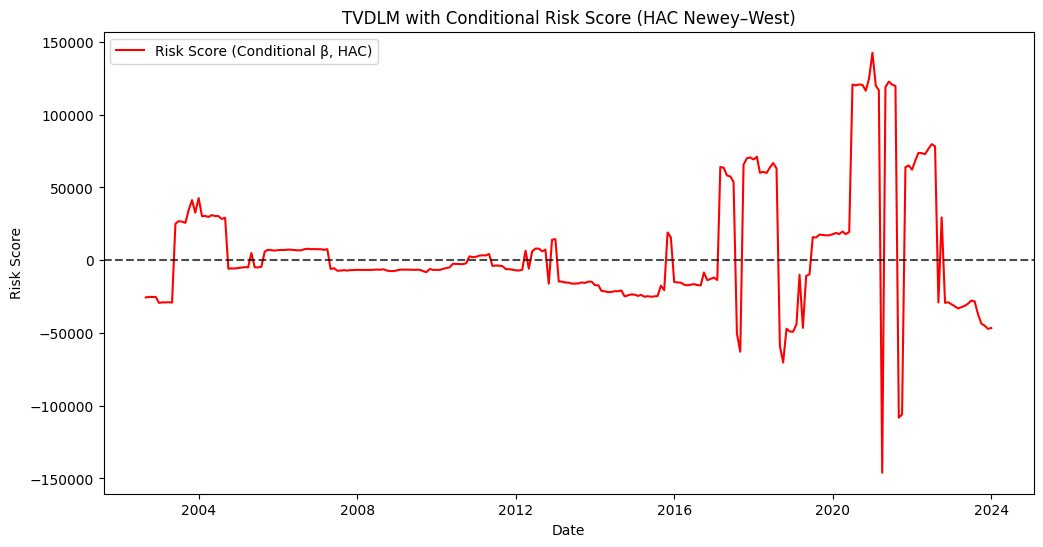

In [45]:
plt.figure(figsize=(12,6))
plt.plot(result_df['date'], result_df['beta'], label='Risk Score (Conditional β, HAC)', color='red')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Risk Score')
plt.title('TVDLM with Conditional Risk Score (HAC Newey–West)')
plt.legend()
plt.show()